In [72]:
#importing packages 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

sns.set_theme(style="darkgrid")
# Reading data 

data = pd.read_csv("adult_data.csv")
test = pd.read_csv("adult_test.csv")

In [3]:
data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
21309,41,Private,172307,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3773,74,?,95825,Some-college,10,Widowed,?,Not-in-family,White,Female,0,0,3,United-States,<=50K
19395,30,Private,183284,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
21868,36,Private,115834,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Wife,White,Female,7298,0,55,United-States,>50K
3296,24,Private,54560,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States,<=50K


In [4]:
test.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
5500,30,Private,154843,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,India,<=50K
7856,19,Private,205953,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,0,20,United-States,<=50K
9314,26,Private,209051,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,25,United-States,<=50K
1248,28,Private,106672,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,2,United-States,<=50K
2639,40,Self-emp-not-inc,167678,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Dominican-Republic,>50K


In [8]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [9]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
#How many unique types of "education" are there for the dataset "adult_data.csv"?
data["education"].nunique()

16

In [27]:
#Which type of education is the most frequent for the dataset "adult_data.csv"?
data.groupby(["education"])['age'].sum().sort_values(ascending=False).reset_index()

,education,age
0,HS-grad,409271
1,Some-college,260699
2,Bachelors,208336
3,Masters,75898
4,Assoc-voc,53281
5,Assoc-acdm,39886
6,11th,38018
7,10th,34922
8,7th-8th,31296
9,Prof-school,25774


In [24]:
#The average value of "hours-per-week" for the dataset "adult_data.csv" lies:
data["hours-per-week"].mean()

40.437455852092995

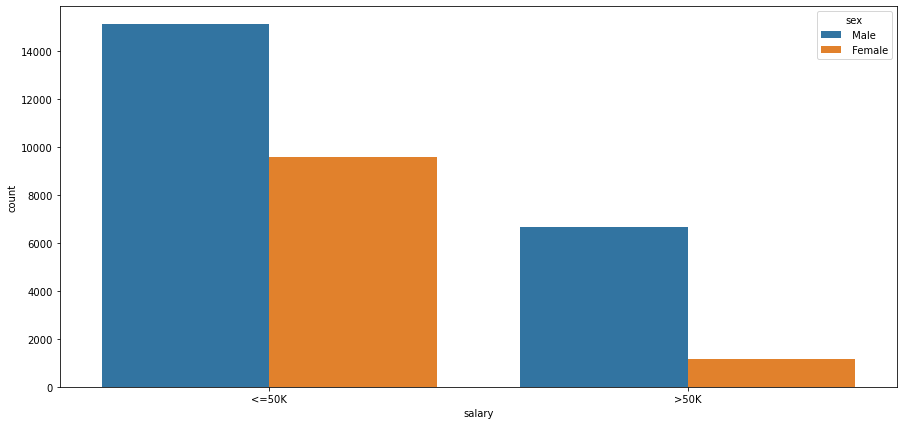

In [45]:
#Which is the correct plot for the salary and sex variables for the dataset "adult_data.csv"?

#data.groupby(["salary"])['age'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(15, 7))
sns.countplot(x="salary",data=data, hue="sex")
plt.show()

In [50]:
data.shape

(32561, 15)

In [49]:
test.shape

(16281, 15)

In [56]:
#Combine the two dataframes. (hint: use concat() function of Pandas). After combining, the new dataframe 
#will be having shape = (48842, 15). Now, what is the value of average "hours-per-week"?
#pd.concat([data,test]).shape
pd.concat([data,test])["hours-per-week"].mean()

40.422382375824085

In [60]:
#Which country ("native-country") has the highest mean value of "hours-per-week" for the dataset "adult_data.csv"?
data.groupby(["native-country"])['hours-per-week'].mean().sort_values(ascending=False).reset_index()


,native-country,hours-per-week
0,Thailand,45.444444
1,France,45.068966
2,Yugoslavia,44.562500
3,Greece,44.241379
4,Iran,43.976744
5,Japan,43.693548
6,Dominican-Republic,42.471429
7,Ireland,42.416667
8,South,42.412500
9,Portugal,41.891892


In [67]:
#What is the average value of "capital-gain" for the dataset "adult_data.csv"?
data["capital-gain"].mean()

1077.6488437087312

<AxesSubplot:xlabel='age', ylabel='Count'>

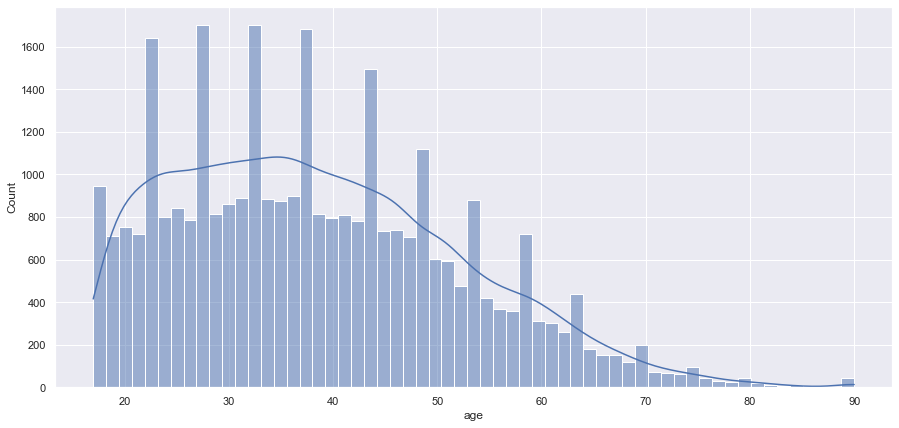

In [74]:

plt.figure(figsize=(15, 7))
sns.histplot(data=data, x="age", kde=True)


In [82]:
data[data["capital-loss"] > 0]["capital-loss"].count()

1519

In [84]:
data.groupby(["occupation"])['hours-per-week'].mean().sort_values(ascending=False).reset_index()


,occupation,hours-per-week
0,Farming-fishing,46.989940
1,Exec-managerial,44.987703
2,Transport-moving,44.656230
3,Protective-serv,42.870570
4,Prof-specialty,42.386715
5,Craft-repair,42.304221
6,Sales,40.781096
7,Machine-op-inspct,40.755744
8,Armed-Forces,40.666667
9,Tech-support,39.432112
